In [3]:
function GradienteDescendente(
    inicio,
    funcion_perdida,
    funcion_gradiente_error, 
    learning_rate :: Real,
    iteraciones_maximas, 
    error_minimo
)
    num_iteraciones = 0
    error = funcion_perdida(inicio)
    w = inicio

    while num_iteraciones < iteraciones_maximas && error > error_minimo
        w = w - eta* funcion_gradiente_error(w)
        num_iteraciones += 1
        error = funcion_perdida(w)
    end 

    return w

end 


GradienteDescendente (generic function with 1 method)

In [47]:
using Plots
using Base.Iterators
using Random
using Printf


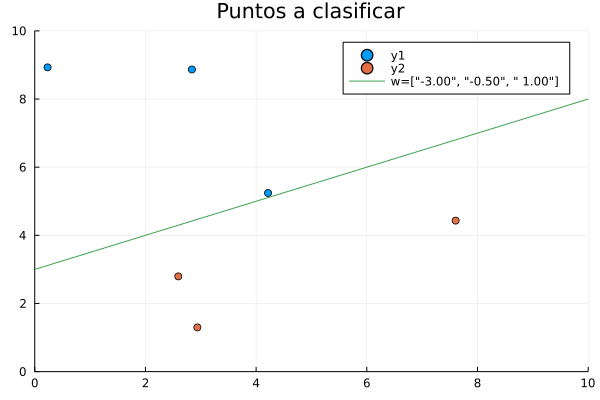

In [55]:

w_ideal = [-3, -0.5, 1]
funcion_ideal(x) = sum([1,x[1],x[2]].* w_ideal)
recta(w,x)= -(w[1]+ w[2]*x)/w[3]
Random.seed!(8);
# Calculamos puntos
numero_puntos = 6
x = map(
    x -> 10*x, 
    rand(Float64, numero_puntos, 1)
    )

y = map(
    x -> 10*x, 
    rand(Float64, numero_puntos, 1)
    )
positivos = map( z ->funcion_ideal(z) >=0 , zip(x,y))
negativos = map(!,positivos)

function Imprime(w)
    plot(x[positivos], y[positivos],seriestype = :scatter, title = "Puntos a clasificar")
    plot!(x[negativos], y[negativos],seriestype = :scatter)
    w_vector = map(s -> @sprintf("%5.2f",s), w)
    display(plot!(x->recta(w,x), label="w=$w_vector", xlims=(0, 10), ylims=(0,10)))
end
Imprime(w_ideal)

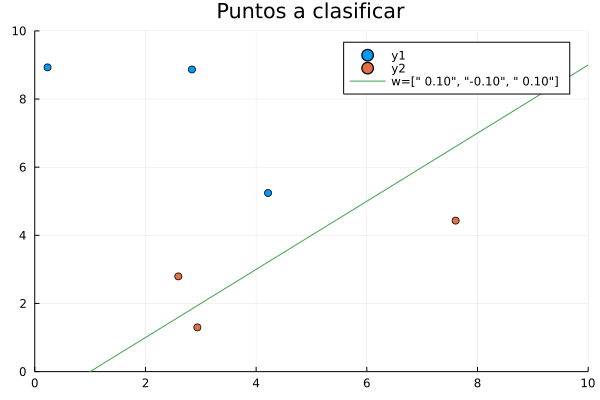

nothing

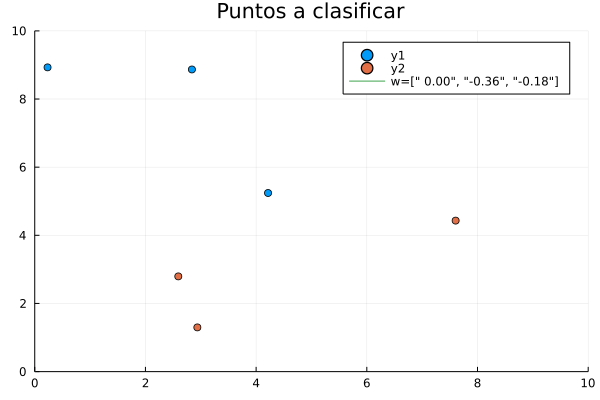

nothing

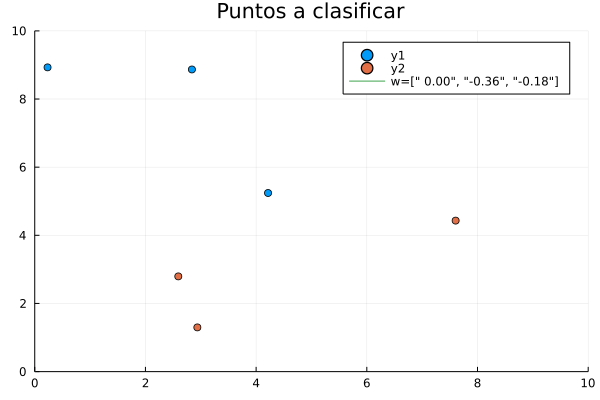

nothing

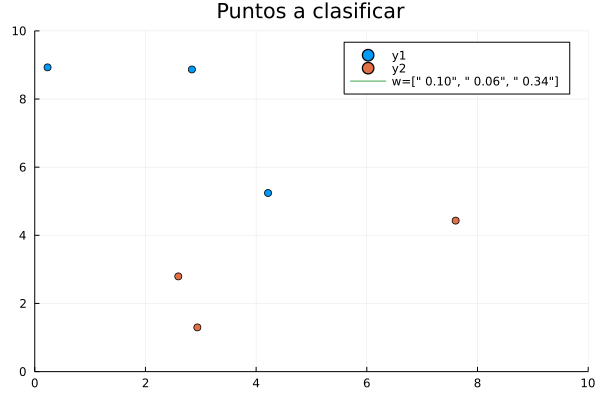

nothing

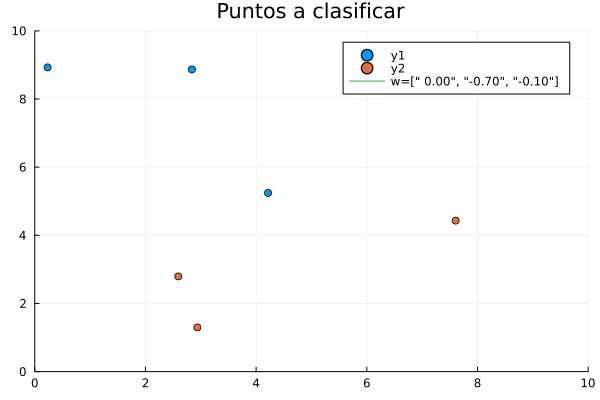

nothing

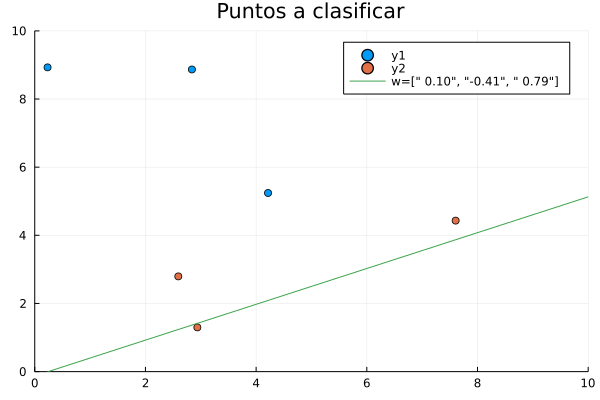

nothing

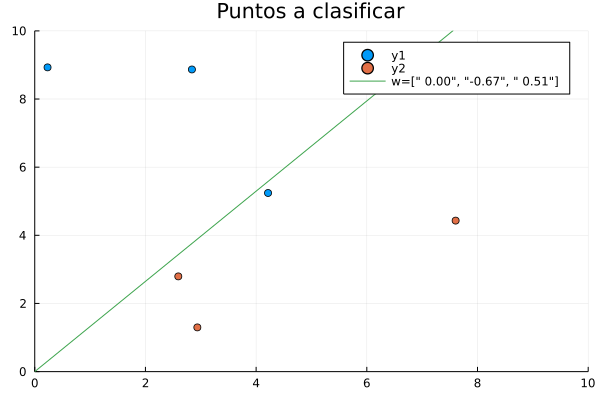

nothing

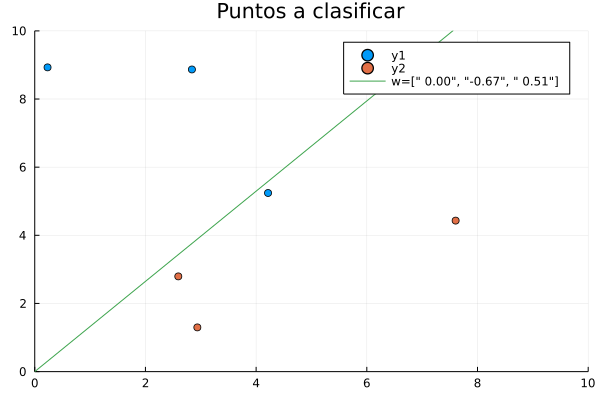

nothing

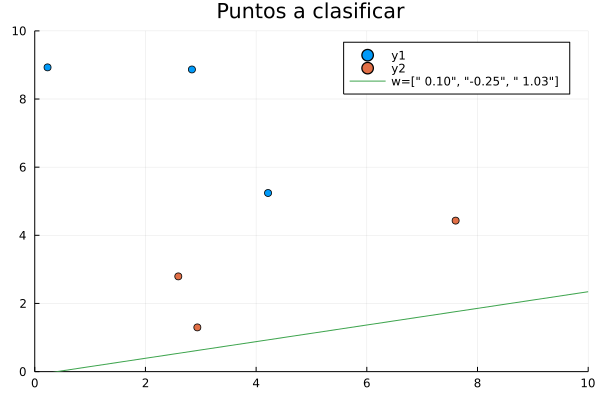

nothing

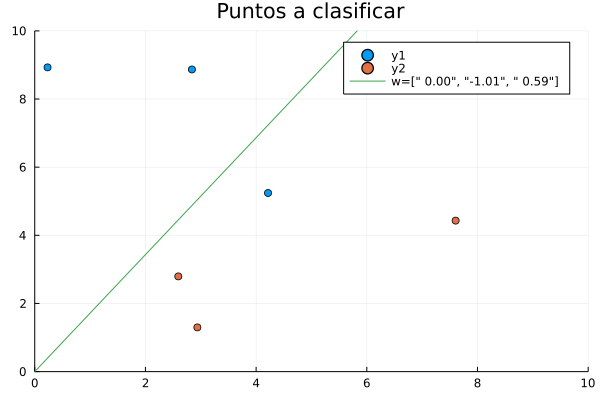

nothing

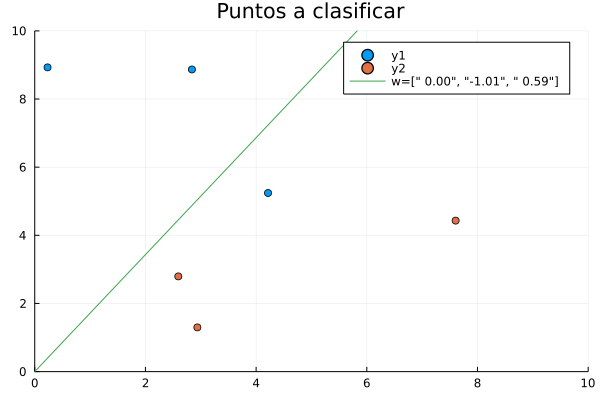

nothing

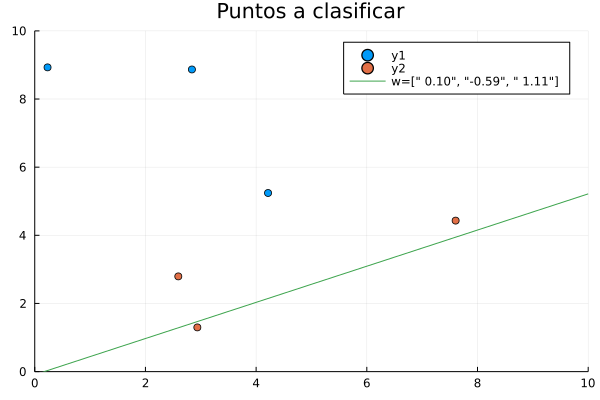

nothing

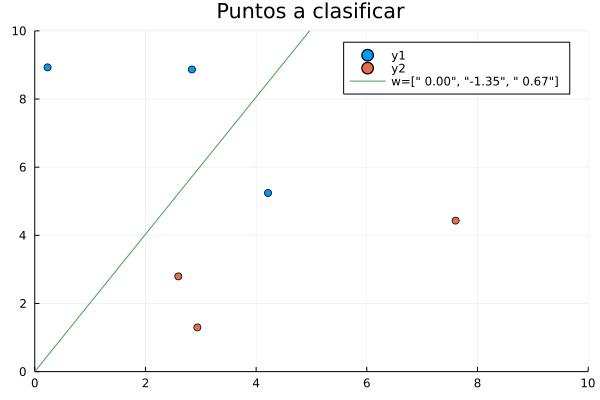

nothing

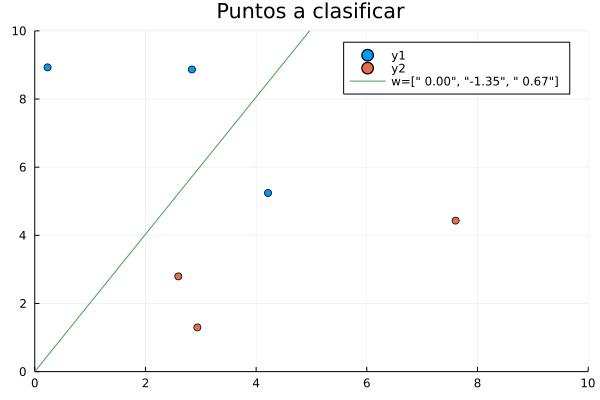

nothing

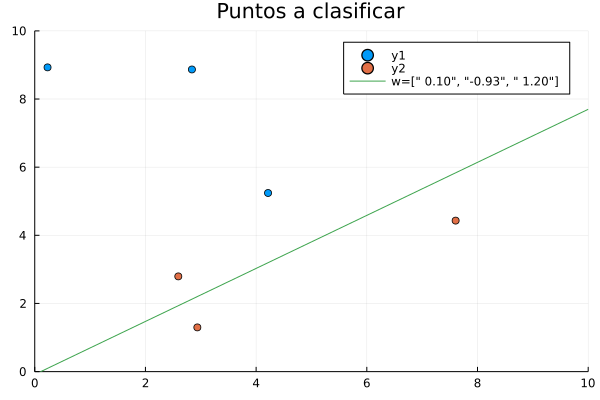

nothing

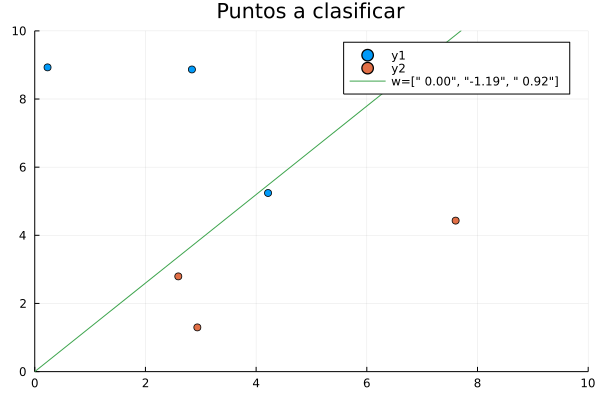

nothing

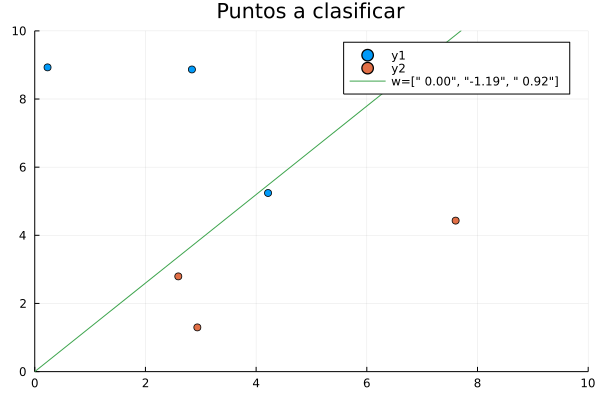

nothing

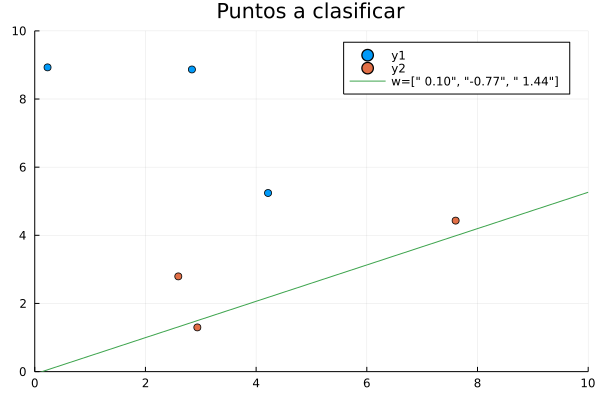

nothing

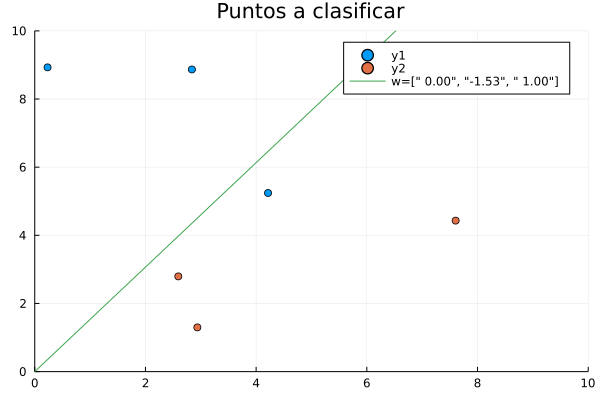

nothing

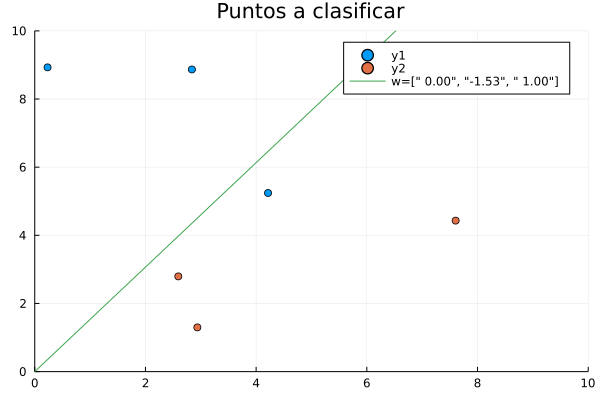

nothing

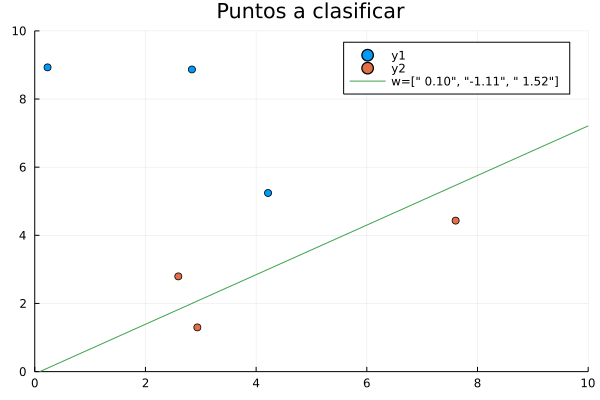

nothing

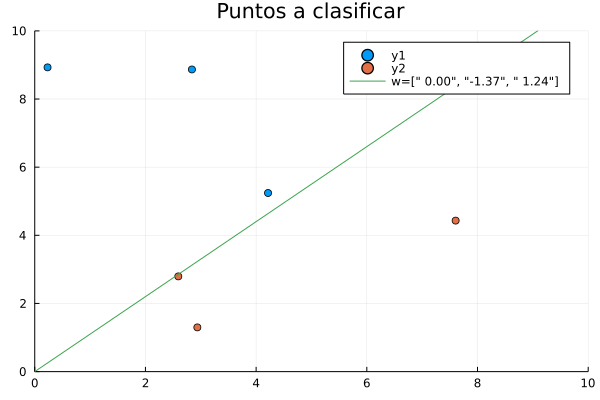

nothing

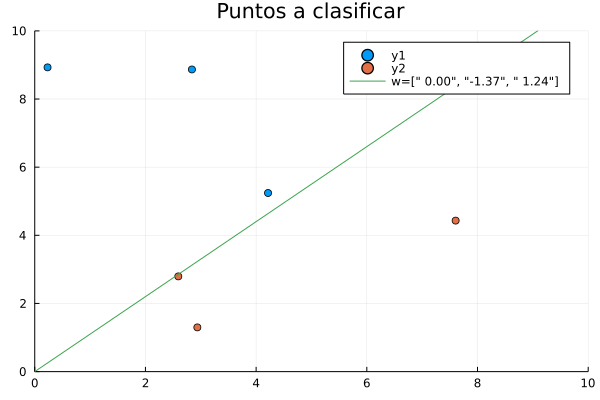

nothing

[0.0, -0.35939431722589965, -0.1794410702776826][0.0, 0.0, 0.0]
[0.1, 0.06213920496637032, 0.3447617199717321][1.0, 4.215335221922699, 5.242027902494147]
[0.0, -0.6983443976565238, -0.09837116584059036][0.0, 0.0, 0.0]
[0.1, -0.41436476718020243, 0.7883355735387667][1.0, 2.8397963047632135, 8.86706739379357]
[0.0, -0.6737590844061021, 0.5088945032610841][0.0, 0.0, 0.0]
[0.1, -0.25222556221383213, 1.0330972935104987][1.0, 4.215335221922699, 5.242027902494147]
[0.0, -1.0127091648367261, 0.5899644076981763][0.0, 0.0, 0.0]
[0.1, -0.5911756426444561, 1.114167197947591][1.0, 4.215335221922699, 5.242027902494147]
[0.0, -1.3516592452673502, 0.6710343121352684][0.0, 0.0, 0.0]
[0.1, -0.9301257230750801, 1.195237102384683][1.0, 4.215335221922699, 5.242027902494147]
[0.0, -1.1895200403009798, 0.9157960321070004][0.0, 0.0, 0.0]
[0.1, -0.7679865181087098, 1.439998822356415][1.0, 4.215335221922699, 5.242027902494147]
[0.0, -1.5284701207316038, 0.9968659365440926][0.0, 0.0, 0.0]
[0.1, -1.10693659853933

(8, [0.0, -1.3663309157652335, 1.2416276565158246])

In [56]:
function CriterioPerceptron(x,y, etiquetas)
    w0 = [0.1, -0.1, 0.1]
    convergencia = false
    learning_rate = 0.1
    cnt = 0
    while !convergencia && cnt < 10
        convergencia = true 
        cnt +=1
        display(Imprime(w0))
        for (i,l) in enumerate(etiquetas)
            prediccion = (sum(w0 .* [1,x[i], y[i]]) >= 0)
            if prediccion != l
                if l
                    w0 = w0 + learning_rate* [1,x[i], y[i]]
                else
                    w0 = w0 - learning_rate* [1,x[i], y[i]]
                end
                println(w0, l.*[1,x[i], y[i]])
                display(Imprime(w0))
                convergencia=false
            end  
        end
    end
    return cnt,w0
end
CriterioPerceptron(x,y,positivos)
